<h1 style="color:Green;">Week 3 Lab - due by 24th July, 2022 (11:59 pm CDT )</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/1_n1rKmuN1fnPN-HWJTYn4zPI4bsTCCEGI8HsmDpRSkc/edit#slide=id.g11b032e97d3_0_0">[Week 3 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to implement machine learning methods and models on regression problems</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas_datareader as pdr

from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h2 style="color:Green;">Problem 1: Real GDP Growth Rate Predictions by Country</h2><br/>

Gross Domestic Products (GDP) growth has been a hot topic in macroeconomics and an economist on your team needs your help to uncover its implications from a statistical learning perspective. The economist gathered some data from the U.S. Bureau of Economic Analysis (BEA) and OECD’s Composite Leading Indicators (CLIs) repositories. The U.S. BEA stores macro and micro-economic measures on a multinational level as the OECD CLIs screens the conditions that dictates the economic booms and busts of OECD countries. <br><br>

4 indictors are gathered from each of the 10 selected OECD countries: monthly real income, employment, industrial production, and wholesale-retail sales. The countries include the United States, United Kingdom, Netherlands, Luxembourg, Japan, Korea, Germany, France, Denmark, and Canada. The indicators are collected over the past 240 months (20 years), from October 1999 to September 2019, so there is a total of 2400 observations. <br><br>

The economist wants to examine the predictive power of these features in a linear model that forecasts the real Gross Domestic Products (GDP) growth rate for each country. 

Ensure your path is correct when loading in the data. For example, if your 'OECD_DATA.csv' file is in your downloads folder, then run pd.read_csv('downloads/OECD_DATA.csv'). In this case, my .csv file in the the same path as this jupyter notebook, so I just have to call pd.read_csv('OECD_DATA.csv').


In [2]:
# loading the csv data set from local directory
OECD = pd.read_csv('OECD_DATA.csv'); OECD = OECD.set_index('Date')
# converting real GDP index to growth rate (we do not take the log this time)
OECD['realGDP'] = OECD['realGDP'].pct_change()
# drop NaN values
OECD = OECD.dropna()
OECD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2399 entries, 11/1/1999 to 9/1/2019
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      2399 non-null   object 
 1   realGDP      2399 non-null   float64
 2   realPersInc  2399 non-null   float64
 3   unempRate    2399 non-null   float64
 4   indProd      2399 non-null   float64
 5   retailSales  2399 non-null   float64
dtypes: float64(5), object(1)
memory usage: 131.2+ KB


a) Based on the economist's specified problem, please identify the explanatory and response variables in the data set.

The explanatory variables are the four indicators (monthly real income, employment, industrial production and wholesale-retail sales) and the 10 countries associated and the response variable is the real Gross Domestic Product growth rate of each country.

b) To make sure the units of the features are aligned, please standardize the numerical features. (Note we cannot standardize categorical features)

In [3]:
OECD.iloc[:,1:] = scale(OECD.iloc[:,1:]) # standardizing indicators

c) Notice that since the Country variable is a categoirical variable, we need to use some kind of numeric indicator to replace the string values in that column. We use dummy variables. A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value. For example, we will add 9 columns  to the data set and name column by the syntax 'Country_[country name]'. Each column will only take on the values 0 or 1; 0 represents that the observation on that row does not belong to the country and 1 represents that the observation on that row belongs to the country. For example, the rows where the Country value is USA' will have the Country_USA column being 1, and the Country_Denmark, Country_France, and so on columns being 0. <br><br>

You may ask why we added 9 columns when there are 10 countries in our original data set. This is because when all 9 dummy variables are set to 0, the regression output will represent the result for the country that doesn't have its own added column. <br><br>

Read this blog for more details: https://abbynyakara.medium.com/dummy-variables-in-machine-learning-b3991367bd59
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [4]:
# declaring dummy variables based on the Country column
OECD = pd.get_dummies(data=OECD, drop_first=True)
# update the FEATURES variable
FEATURES = OECD.columns[1:]
# display top rows of the new data set
OECD.head()

,realGDP,realPersInc,unempRate,indProd,retailSales,Country_Denmark,Country_France,Country_Germany,Country_Japan,Country_Korea,Country_Luxembourg,Country_Netherlands,Country_UK,Country_USA
Date,,,,,,,,,,,,,,
11/1/1999,0.560013,1.796302,-0.821803,-0.808932,-0.384360,0,0,0,0,0,0,0,0,1
12/1/1999,0.392236,1.775151,-0.871149,-0.748722,-0.286125,0,0,0,0,0,0,0,0,1
1/1/2000,0.336263,1.769032,-0.871149,-0.746977,-0.346280,0,0,0,0,0,0,0,0,1
2/1/2000,0.336065,1.769869,-0.821803,-0.723416,-0.288399,0,0,0,0,0,0,0,0,1
3/1/2000,0.391506,1.764942,-0.871149,-0.695493,-0.261159,0,0,0,0,0,0,0,0,1


Please run the above code chunk an observe that the new columns are added to the original data frame to represent the dummy variables. <br><br>
Now, please write a code piece to split the data into 75% training and 25% testing sets.

In [5]:
FEATURES = OECD.columns[1:] # four indicators and countries
LABEL = 'realGDP' # response variable
FEATURES
# I added this section because in the previous version I wrote the code mixed up
# the response variable and the indicators. So I split them up to avoid mistakes.

Index(['realPersInc', 'unempRate', 'indProd', 'retailSales', 'Country_Denmark',
       'Country_France', 'Country_Germany', 'Country_Japan', 'Country_Korea',
       'Country_Luxembourg', 'Country_Netherlands', 'Country_UK',
       'Country_USA'],
      dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(OECD.loc[:, FEATURES], OECD.loc[:, LABEL], test_size=0.25, random_state=0)

d) We are told by the economist that all the features are very important predictors for the GDP growth rate, and hence, we will take his words and skip the exploration of importance scores. He also mentions that there is no multicollinearity based on his initial analysis. <br><br> 
Please validate the economist's statements, in other words, show that:
<ul>
  <li>All the features (excluding the dummy variables) are important</li>
  <li>No multicollinearity exists between features </li>
</ul>
To respect the economist's claims, please DO NOT drop any features. (Hint: the dummy variables should not be significant, but keep them because we need them to make predictions for each country)

<i>Test feature importance here:</i>

Text(0.5, 0, 'Relative Importance')

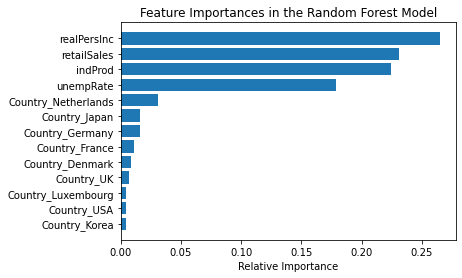

In [7]:
from sklearn.ensemble import RandomForestRegressor # importing the random forest module
rf_model = RandomForestRegressor(random_state=0) # define the random forest model
rf_model.fit(X_train, y_train) # fit the random forest model
importances = rf_model.feature_importances_ # get importance
indices = np.argsort(importances) # sort the features' index by their importance scores

plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

The Importance Scores of the four indicators all much greater than the others and above 0.15 tells us they are important estimators for GDP growth.

<i>Test multicolinearity here:</i>

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(OECD.loc[:, FEATURES].values, i) for i in range(len(FEATURES))]
VIF_table = pd.DataFrame({'Features': FEATURES, 'VIF': VIF})
VIF_table

,Features,VIF
0,realPersInc,1.723912
1,unempRate,2.435666
2,indProd,2.242862
3,retailSales,2.094585
4,Country_Denmark,1.166142
5,Country_France,1.891253
6,Country_Germany,1.134902
7,Country_Japan,1.186148
8,Country_Korea,1.977866
9,Country_Luxembourg,1.411761


The low VIFs show that all features have low collinear relationship with each other, which increases the credibility of the model (by fitting in the assumption of independent variables).

e) Please wirte a code piece to fit a multiple linear regression to the data, then print the resulting Adjusted R-squared, MAE, and RMSE metrics. 

In [9]:
linear_model = LinearRegression()

#fit regression model
linear_model = linear_model.fit(X_train, y_train)

X_ols = sm.add_constant(X_train)
statsmodel = sm.OLS(y_train, X_ols).fit()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print('The Adjusted R-squared is: ', 1-(1-r2)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae)
print('The RMSE is: ', rmse)

The Adjusted R-squared is:  -0.0001604023922217035
The MAE is:  0.6279066917230656
The RMSE is:  0.903350612492966


f) Please wirte a code piece to fit a ridge regression to the data, then print the resulting Adjusted R-squared, MAE, and RMSE metrics.

In [10]:
from sklearn.linear_model import RidgeCV
# initiate the 5-Fold cross validation 
ridge_model = RidgeCV(cv=5, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(X_train, y_train)
# print('The lambda is:', ridge_model.alpha_)

# calculating model metrics
y_test_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)

# printing model metrics
print('The Adjusted R-squared is: ', 1-(1-r2_ridge)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae_ridge)
print('The RMSE is: ', rmse_ridge)

The Adjusted R-squared is:  -0.0011210804926706786
The MAE is:  0.6278152293948156
The RMSE is:  0.9037843533487869


g) Please wirte a code piece to fit a lasso regression to the data, then print the resulting Adjusted R-squared, MAE, and RMSE metrics.

In [11]:
from sklearn.linear_model import LassoCV
# initiate 5-Fold cross validation 
lasso_model = LassoCV(cv=5) # uses scoring='r2'by default
# fit the model with the best alpha
lasso_model = lasso_model.fit(X_train, y_train)
# print('The lambda is:', lasso_model.alpha_)

# calculating model metrics
y_test_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_test_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)

# printing model metrics
print('The Adjusted R-squared is: ', 1-(1-r2_lasso)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae_lasso)
print('The RMSE is: ', rmse_lasso)

The Adjusted R-squared is:  -0.0016100473091211764
The MAE is:  0.6283568456642291
The RMSE is:  0.9040050392474114


h) Compare the three models you just fitted. Which one turns out to be the best and why? (Hint: since we included 9 dummy variables in the model that are not as significant, we may be overfitting, hence leading to a negative adjusted R-squared. You can ignore the adjusted R-squared if this happends, and just compare the MAE and RMSE.)

A Ridge Regression turns out to be the best because its MAE (mean average error) is lowest of the three regressions, which means its mean distance from the actual observations is lowest and thus making it a good fit, and although it is a little bit higher than Linear Regression in RMSE (root mean squared error), the advantage of Ridge Regression of lesser overfitting alleviates that drawback.

i) Based on the model you selected, write a code piece that prints the intercept and coefficient estimates, then write out the formula based on the printed output.

y=-0.06573043139640926 + 0.05264975(monthly real income) + 0.18439749(unemployment rate) + 0.10720508 (industrial production) + 0.00888937 (retail sales) + 0.00818831(whether is Country Denmark)-0.25041499 (whether is Country France) + -0.06875879(Country_Germany) + 0.14270863(Country_Japan) + 0.40915925(Country_Korea) + 0.11764185(Country_Luxembourg) + 0.05609035(Country_Netherlands) + 0.01157154(Country_UK) + 0.08596397(Country_USA)

In [12]:
print('intercept:', ridge_model.intercept_)
print('coefficient:', ridge_model.coef_)

intercept: -0.06573043139640926
coefficient: [ 0.05264975  0.18439749  0.10720508  0.00888937  0.00818831 -0.25041499
 -0.06875879  0.14270863  0.40915925  0.11764185  0.05609035  0.01157154
  0.08596397]


j) What can be done to improve the Adjusted $R^2$ ?

We can drop those features that are relatively less important, for example lower than 0.05 to avoid overfitting of these not important features (basically countries). Then the explanatory variables that are left will explain more variations of the response variable (rGDP growth). Instead, we could fit the model for every different country and mapping them out together instead of fitting them on the same model.